In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics as metrics
import seaborn as sns
import statsmodels.api as sm
import pylab
from scipy import stats
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.stats.api as sms
sns.set(rc={'figure.figsize':(13,10)})
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import geohash as gh
from sklearn.cluster import KMeans 

In [2]:
houses = pd.read_csv('housing.csv')

In [3]:
houses['geohash']=houses.apply(lambda x: gh.encode_uint64(x.latitude, x.longitude), axis=1)

In [4]:
# len(houses['geohash'].unique())

In [5]:
# agc = KMeans(30)

In [6]:
# houses['cluster'] = agc.fit_predict(houses[['latitude','longitude']])

In [7]:
# 
# sns.relplot(x="latitude", y="longitude", hue="cluster", data=X_train)

In [8]:
# sns.histplot(x = 'geohash', data=houses, bins=100)

In [9]:
len(houses)

20640

In [10]:
# aux = houses[houses['median_house_value'] == 500001].sample(n = 30)
# houses = houses[houses['median_house_value'] < 500001]
# houses = pd.concat([aux, houses])

In [11]:
houses['familia_population'] = houses['median_income'] / (houses['population'] / houses['households'])
houses['population_households'] =  (houses['population'] / houses['households'])
# houses['total_rooms_bedrooms'] =  (houses['total_rooms'] / houses['total_bedrooms'])

In [12]:
houses = houses.drop(columns=['median_income'])

In [13]:
houses['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [14]:
aux = houses.copy()
# houses[houses['housing_median_age'] <=10]
aux.loc[aux['housing_median_age'] <= 10, 'house_old'] = 0
aux.loc[aux['housing_median_age'] > 10, 'house_old'] = 1
aux.loc[aux['housing_median_age'] > 20, 'house_old'] = 2
aux.loc[aux['housing_median_age'] > 30, 'house_old'] = 3
aux.loc[aux['housing_median_age'] > 40, 'house_old'] = 4
# aux.loc[aux['housing_median_age'] > 50, 'house_old'] = 5

aux['house_old'] = aux['house_old'].astype('int64')

In [15]:
# sns.countplot(x='house_old', data=aux)

In [16]:
houses = aux.drop(columns = ['housing_median_age'])

In [17]:
houses_median_value = houses['median_house_value']

In [18]:
houses = houses.drop(columns=['median_house_value'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(houses, houses_median_value, test_size = 0.15, random_state= 0, shuffle = True)

In [20]:
X_train = X_train.copy()
X_test = X_test.copy()

In [21]:
# X_train['cluster'] = agc.fit_predict(X_train[['latitude','longitude']])

In [22]:
# X_test['cluster'] = agc.predict(X_test[['latitude','longitude']])

In [23]:
# temp_houses = pd.concat([X_train, y_train], axis = 1)

In [24]:
# len(temp_houses[temp_houses['median_house_value'] == 500001])

In [25]:
# aux = temp_houses[temp_houses['median_house_value'] == 500001].sample(frac = 1/3)
# temp_houses = temp_houses[temp_houses['median_house_value'] < 500001]
# temp_houses = pd.concat([aux, temp_houses])
# temp_houses = temp_houses.sample(frac = 1)

In [26]:
# y_train = temp_houses['median_house_value']
# X_train = temp_houses.drop(columns = ['median_house_value'])

In [27]:
 X_train['total_bedrooms'].fillna(X_train['total_bedrooms'].median(), inplace = True)
 X_test['total_bedrooms'].fillna(X_train['total_bedrooms'].median(), inplace = True)

In [28]:
X_train['total_bedrooms_rooms'] = X_train['total_rooms'] / X_train['total_bedrooms']
X_test['total_bedrooms_rooms'] = X_test['total_rooms'] / X_test['total_bedrooms']

X_train['population_rooms'] = X_train['population'] / X_train['total_rooms']
X_test['population_rooms'] = X_test['population'] / X_test['total_rooms']

X_train['household_rooms'] = X_train['households'] / X_train['total_rooms']
X_test['household_rooms'] = X_test['households'] / X_test['total_rooms']

# X_train['population_bedrooms'] = X_train['population'] / X_train['total_bedrooms']
# X_test['population_bedrooms'] = X_test['population'] / X_test['total_bedrooms']

# X_train['household_bedrooms'] = X_train['households'] / X_train['total_bedrooms']
# X_test['household_bedrooms'] = X_test['households'] / X_test['total_bedrooms']

In [29]:
X_train.loc[X_train['ocean_proximity'] == 'ISLAND', 'ocean_proximity'] = 0 
X_train.loc[X_train['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity'] = 1 
X_train.loc[X_train['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity'] = 1
X_train.loc[X_train['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = 2
X_train.loc[X_train['ocean_proximity'] == 'INLAND', 'ocean_proximity'] = 3

X_test.loc[X_test['ocean_proximity'] == 'ISLAND', 'ocean_proximity'] = 0 
X_test.loc[X_test['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity'] = 1 
X_test.loc[X_test['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity'] = 1
X_test.loc[X_test['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = 2
X_test.loc[X_test['ocean_proximity'] == 'INLAND', 'ocean_proximity'] = 3



<AxesSubplot:>

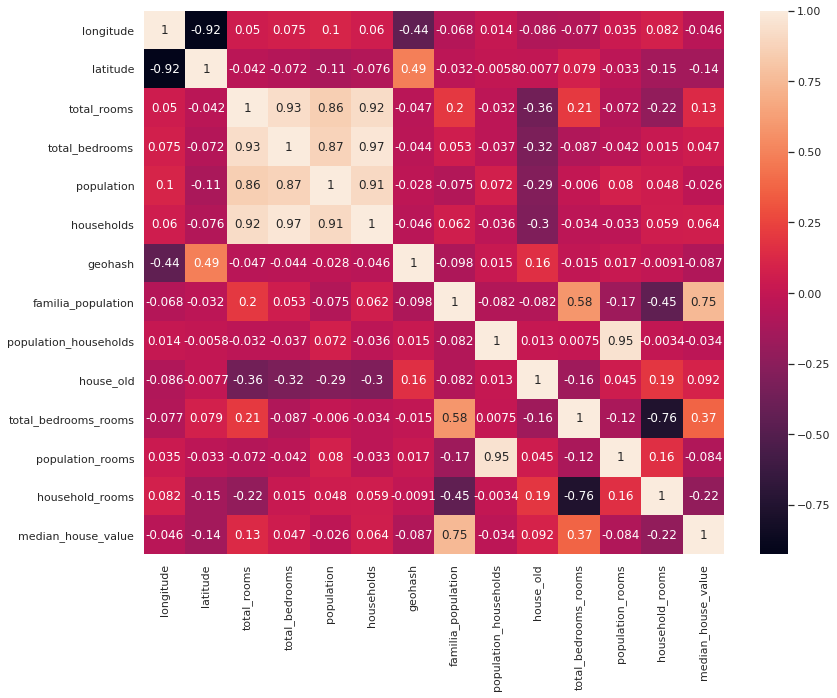

In [30]:
temp_houses = pd.concat([X_train, y_train], axis = 1)
sns.heatmap(temp_houses.corr(), annot=True)

In [31]:
# # # X_train['housing_median_age'] = X_train['housing_median_age'].apply(np.log)
# # X_train['latitude'] = X_train['latitude'].apply(np.log)
# # X_train['longitude'] = X_train['longitude'].apply(np.log)
# X_train['total_rooms'] = X_train['total_rooms'].apply(np.log)
# X_train['total_bedrooms'] = X_train['total_bedrooms'].apply(np.log)
# X_train['population'] = X_train['population'].apply(np.log)
# X_train['households'] = X_train['households'].apply(np.log)
# X_train['familia_population'] = X_train['familia_population'].apply(np.log)
# X_train['population_rooms'] = X_train['population_rooms'].apply(np.log)
# X_train['household_rooms'] = X_train['household_rooms'].apply(np.log)
# X_train['total_bedrooms_rooms'] = X_train['total_bedrooms_rooms'].apply(np.log)
# # # X_train['median_income'] = X_train['median_income'].apply(np.log)

# # # X_test['housing_median_age'] = X_test['housing_median_age'].apply(np.log)
# # X_train['latitude'] = X_train['latitude'].apply(np.log)
# # X_train['longitude'] = X_train['longitude'].apply(np.log)
# X_test['total_rooms'] = X_test['total_rooms'].apply(np.log)
# X_test['total_bedrooms'] = X_test['total_bedrooms'].apply(np.log)
# X_test['population'] = X_test['population'].apply(np.log)
# X_test['households'] = X_test['households'].apply(np.log)
# X_test['familia_population'] = X_test['familia_population'].apply(np.log)
# X_test['total_bedrooms_rooms'] = X_test['total_bedrooms_rooms'].apply(np.log)
# X_test['population_rooms'] = X_test['population_rooms'].apply(np.log)
# X_test['household_rooms'] = X_test['household_rooms'].apply(np.log)

# # population_rooms
# # # X_test['median_income'] = X_test['median_income'].apply(np.log)


In [32]:
min_max = MinMaxScaler() 

X_train = min_max.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = min_max.transform(X_test)
X_test = pd.DataFrame(X_test)

In [33]:
# regr = RandomForestRegressor()
# regr =  xgboost.XGBRegressor(subsample = 0.8, n_estimators = 300, max_depth = 8, learning_rate = 0.05, gamma = 1)
regr = xgboost.XGBRegressor()
# regr = LinearRegression()

In [34]:
# {'subsample': 0.8,
#  'n_estimators': 300,
#  'max_depth': 8,
#  'learning_rate': 0.05,
#  'gamma': 1}

In [35]:
# para_tunning = {
#         'learning_rate': [0.01,0.05,0.1],
# #         'min_child_weight': [1, 5, 10],
#         'gamma': [0, 0.5, 1, 1.5],
#         'subsample': [0.6, 0.8, 1.0],
# #         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [ 4, 5, 6, 7, 8],
#         "n_estimators": [100 ,150, 200, 300],
# #         "alpha":[0,2,4,6,8]
#         }

In [36]:
# clf_rndcv = RandomizedSearchCV(regr, 
#                          param_distributions = para_tunning,
#                          cv = 3,  
#                          n_iter = 30,
#                          scoring = 'r2', 
#                          error_score = 0, 
#                          verbose = 3, 
#                          n_jobs = -1,
#                          random_state = 42)

In [37]:
regr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
# clf_rndcv.best_params_

In [39]:
y_pred = regr.predict(X_test)

In [40]:
r2_score(y_test, y_pred)

0.8613621400768711

In [41]:
 metrics.mean_squared_error(y_test,y_pred)

1836952870.7500134

In [42]:
 metrics.mean_absolute_error(y_test,y_pred)

27581.385857002988

In [43]:

# importances = regr.feature_importances_
# forest_importances = pd.Series(importances, index = X_train.columns)

# std = np.std([
#     tree.feature_importances_ for tree in regr.estimators_], axis=0)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [44]:
residuos = y_test - y_pred

/home/victor/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

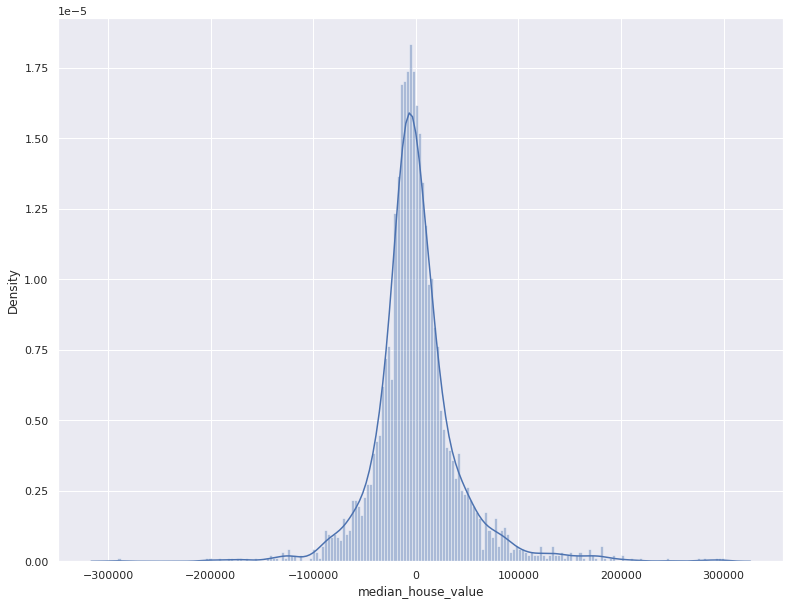

In [45]:
#Verificando se os residuos seguem uma distribuição normal 
sns.distplot(residuos,bins=200)

((array([-3.51022992, -3.26704653, -3.13259612, ...,  3.13259612,
          3.26704653,  3.51022992]),
  array([-290783.71875 , -203249.90625 , -201222.      , ...,
          291823.203125,  296525.578125,  300491.1875  ])),
 (40223.049005546265, 424.43018839833064, 0.9375673634263126))

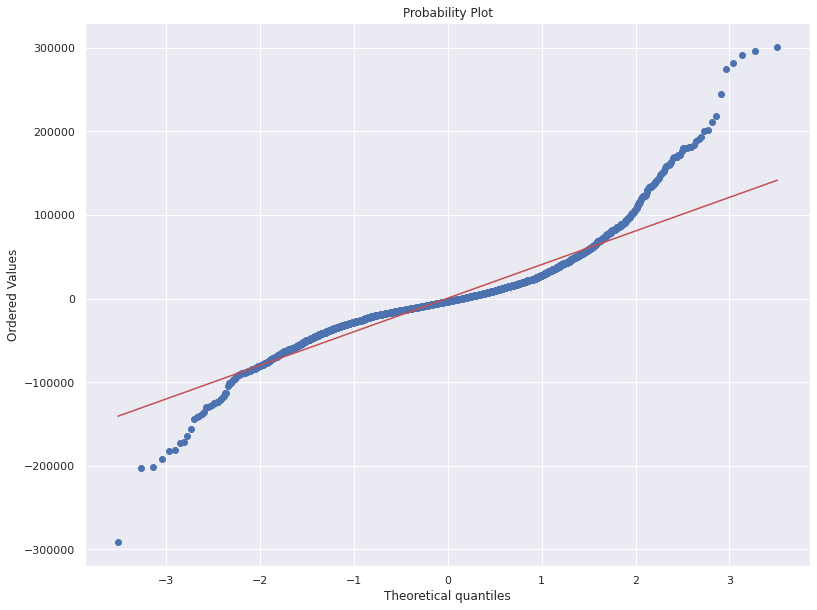

In [46]:
stats.probplot(residuos,plot=pylab)

In [47]:
stats.normaltest(residuos)

NormaltestResult(statistic=868.7307196270006, pvalue=2.2778289225860764e-189)

In [48]:
residuos = np.sort(residuos)
shapiro_test = stats.shapiro(residuos)
print(shapiro_test.pvalue)

9.10844001811131e-44


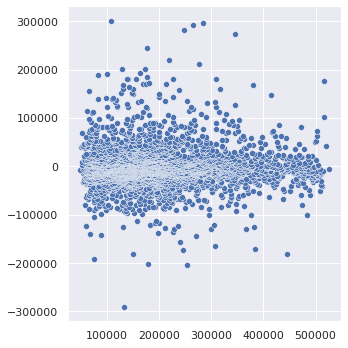

In [49]:
sns.relplot(x=y_pred, y=residuos)

In [50]:
y_test[y_test == 500001]

10574    500001.0
10472    500001.0
17237    500001.0
5288     500001.0
15700    500001.0
           ...   
9370     500001.0
17234    500001.0
10805    500001.0
17306    500001.0
17171    500001.0
Name: median_house_value, Length: 148, dtype: float64